In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [8]:
file_path_test = "./q2test.xlsx"
file_path_train = "./q2train.xlsx"
data_test = pd.read_excel("q2test.xlsx")
data_train = pd.read_excel(file_path_train)


In [3]:
data_train.head()

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


In [4]:
x = np.array(data_train.iloc[:, :-1])
y = np.array(data_train.iloc[:, -1]).reshape(-1,1)
theta_initial = np.array([0.1,0.1,0.1]).reshape(-1,1)

----------------------------------------------------------
Logistic Regression
Number of Iterations:  189561
Time Taken:  7.350202322006226
The Values of theta for Logistic regression [[-4.71972859]
 [ 0.06900916]
 [ 0.00665459]]
The Final cost is:  0.480046705755547
----------------------------------------------------------


Text(0.5, 1.0, 'Cost vs Number of iterations: Logistic regression')

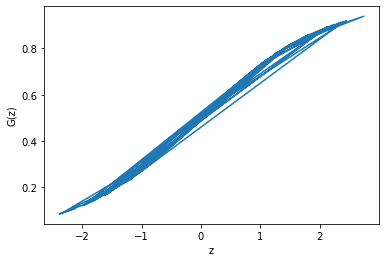

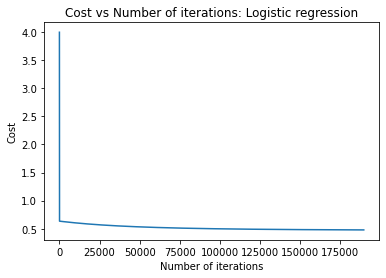

In [5]:
def sigmoid(x):
    val = (1.0/(1.0+np.exp(-x)))
    return val

def grad(X, Y, theta):
    val = np.dot(X.transpose(),sigmoid(np.dot(X, theta)) -Y)/len(Y)
    return val

def logistic_clf(x,y,theta,alpha, iterations):
    z = 1.e-10
    print("----------------------------------------------------------")
    print("Logistic Regression")
    x_only = x
    x = np.hstack((np.ones(y.shape), x))
    error = 100.0
    cost_vs_itr = []
    count = 0
    sig = sigmoid(np.dot(x, theta))
    cost = -(y*(np.log(sig+z))+((1-y)*np.log(1-sig +z))).mean()

    begin = time.time()
    while error> 1.e-7:
        theta = theta - alpha*(grad(x,y,theta))
        sig = sigmoid(np.dot(x, theta))
        cost_new = (-y*(np.log(sig+z))-((1-y)*np.log(1-sig +z))).mean()
        error = abs(cost_new - cost)
        cost_vs_itr.append([cost_new, count])
        cost = cost_new
        count+=1
    end = time.time()
    plt.plot(np.dot(x, theta), sig)
    plt.ylabel("G(z)")
    plt.xlabel("z")
    print("Number of Iterations: ",count)
    print("Time Taken: ", end - begin)
    print("The Values of theta for Logistic regression",theta)
    print("The Final cost is: ", cost_new)
    print("----------------------------------------------------------")
    return theta, pd.DataFrame(cost_vs_itr)

theta, graph = logistic_clf(x , y, theta_initial, 0.001,100000)
logistic_reg_theta = theta

plt.figure()
sns.lineplot(data=graph, x =graph.iloc[:, 1], y =graph.iloc[:, 0] )
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations: Logistic regression")

<AxesSubplot:title={'center':'Results on Test Data'}, xlabel='Aptitude', ylabel='Verbal'>

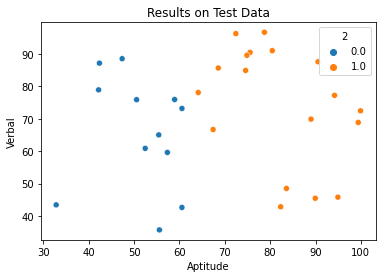

In [52]:
def y_prediction(x, theta):
    X = np.hstack((np.ones((x.shape[0],1)),x))
    Y = np.ones((x.shape[0],1))
    val = sigmoid(np.dot(X, theta))
    rep = np.where(val<0.5)
    Y[rep] = 0
    return Y

x_test = np.array(data_test.iloc[:])
y_pred = y_prediction(x_test, theta).astype(np.uint8)
np.savetxt('output1.txt', y_pred, newline='\n', fmt="%.0g")


plt.figure()
plt.title("Results on Test Data")
plt.xlabel("Aptitude")
plt.ylabel("Verbal")
df = pd.DataFrame(np.hstack((x_test, y_pred)))
sns.scatterplot(data = df, x = df.iloc[:,0], y= df.iloc[:,1], hue=2)
